<a href="https://colab.research.google.com/github/19522531/CS112.L21/blob/main/Assignments/Scatter_plot" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import svm
from google.colab import drive
import csv
import pandas
drive.mount('/content/gdrive') 
# Đọc dữ liệu từ google drive
path_data = '/content/gdrive/MyDrive/data_cs114/wecode.csv'
path_data1 = '/content/gdrive/MyDrive/data_cs114/score_training.csv'

Mounted at /content/gdrive


In [ ]:
#load dữ liệu vào data và table_score
data = pandas.read_csv(path_data)
table_score=pandas.read_csv(path_data1)


In [ ]:
# Xóa các dữ liệu thiếu
table_score = table_score.apply (pandas.to_numeric, errors='coerce')
table_score = table_score.dropna(how = 'any',axis= 0)
table_score
table_score=table_score.rename(columns={'id' : 'user_id'})# Đối tên id thành user_id để kết với bảng wecode

In [ ]:
print(table_score)

     user_id    QT    GK    TH    CK   TBM  TBTL
0         22  10.0   9.0   8.5   8.5   8.8  8.52
1         24  10.0   8.0  10.0   9.5   9.4  8.41
2         27  10.0  10.0  10.0  10.0  10.0  8.67
3         28  10.0   9.5   7.5   9.5   9.2  7.39
4         29  10.0   9.5   5.0   8.5   8.2  8.05
..       ...   ...   ...   ...   ...   ...   ...
969     1856   5.0   5.5   7.0   7.5   6.7  7.34
970     1857   5.0   4.5  10.0   4.0   6.0  6.03
971     1859   8.0   5.0  10.0   1.5   5.4  5.06
972     1862   5.0   6.5   1.0   7.5   5.1  4.71
974     1866   9.0   7.5   2.0   5.0   5.0  7.05

[785 rows x 7 columns]


In [ ]:
# Tổng pre_score của các submssion có is_final = 1
total_score=data.groupby('user_id').agg(Diem =('pre_score', 'sum'))

#Nhập bảng
table3=pandas.merge(total_score, table_score ,on=['user_id'])
table3=table3.apply(pandas.to_numeric, errors='coerce')
table3=table3.dropna()
print(table3)
X=table3['Diem']
Y=table3['CK']
x=[]
y=[]
for i in range(len(table3.index)):
  x.append(X[i])
  y.append(Y[i])
print(x, y)

     user_id     Diem    QT    GK    TH    CK   TBM  TBTL
0         24  1031674  10.0   8.0  10.0   9.5   9.4  8.41
1         27    52000  10.0  10.0  10.0  10.0  10.0  8.67
2         29  1225828  10.0   9.5   5.0   8.5   8.2  8.05
3         35  1809718   7.0   9.5   6.0   4.5   6.2  5.75
4         37  1550820   5.5   5.5   7.5   7.5   6.9  8.27
..       ...      ...   ...   ...   ...   ...   ...   ...
677     1771   834936   0.0   5.0   4.0   5.5   4.4  6.40
678     1856   329074   5.0   5.5   7.0   7.5   6.7  7.34
679     1857   389000   5.0   4.5  10.0   4.0   6.0  6.03
680     1859    39000   8.0   5.0  10.0   1.5   5.4  5.06
681     1862    40000   5.0   6.5   1.0   7.5   5.1  4.71

[682 rows x 8 columns]
[1031674, 52000, 1225828, 1809718, 1550820, 3356653, 2411386, 2378013, 1284084, 1636504, 1588532, 1064382, 2273787, 86388, 281281, 323236, 2849447, 0, 1325251, 799474, 632089, 2742813, 1278045, 922753, 1412729, 20000, 1026620, 2238994, 3926962, 1174332, 1305175, 2330154, 3129496,

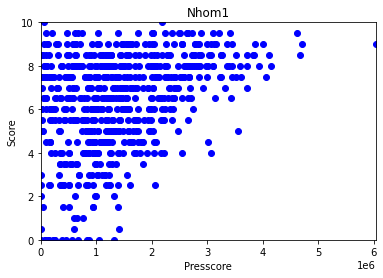

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Presscore = np.array(x)
Score = np.array(y)
plt.xlim(0, max(x))
plt.ylim(0, 10)
plt.scatter(Presscore,Score,c="blue")
plt.title("Nhom1")
plt.xlabel("Presscore")
plt.ylabel("Score")

plt.show()

#### Nhận xét
Biểu đồ có số lượng tập trung vào phần bên trái phía trên biểu đồ
- Lý giải cho điều này là số lượng assignment cũng như problem của mỗi bạn là khác nhau nên tổng điểm lớn nhất có thể của mỗi bạn là khác nhau. Vì vậy, mặc dù điểm prescore của các bạn có thể không cao, nhưng điểm cuối kỳ của các bạn cũng có thể đạt được điểm cao

In [ ]:
# Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
#số problem đã solved được
nhom1=data[data.is_final==1]
nhom1=nhom1[nhom1.pre_score==10000]
temp=nhom1[['user_id','is_final']]
temp=temp.groupby('user_id').sum()
temp=temp.rename(columns={'is_final':'solved'})
# print(temp)
#đếm số lượng problem có submit-
count_submit = data[data.is_final==1]
count_submit = count_submit.groupby(['user_id'])['is_final'].sum()
count_submit=count_submit.reset_index().rename(columns= {'is_final':'count'})
# print(count_submit)

table=pandas.merge(temp, count_submit ,on=['user_id'])
table=pandas.merge(table, table_score, on = ['user_id'])
print(table)
table=table.apply(pandas.to_numeric, errors='coerce')
table=table.dropna()
table['soldivsub']=table['solved']/table['count']
print(table[['user_id', 'soldivsub']])

     user_id  solved  count    QT    GK    TH    CK   TBM  TBTL
0         24      72     77  10.0   8.0  10.0   9.5   9.4  8.41
1         27       3      5  10.0  10.0  10.0  10.0  10.0  8.67
2         29      72     80  10.0   9.5   5.0   8.5   8.2  8.05
3         35     145    151   7.0   9.5   6.0   4.5   6.2  5.75
4         37      93    102   5.5   5.5   7.5   7.5   6.9  8.27
..       ...     ...    ...   ...   ...   ...   ...   ...   ...
669     1771      49     74   0.0   5.0   4.0   5.5   4.4  6.40
670     1856      23     31   5.0   5.5   7.0   7.5   6.7  7.34
671     1857      37     40   5.0   4.5  10.0   4.0   6.0  6.03
672     1859       3     30   8.0   5.0  10.0   1.5   5.4  5.06
673     1862       4      6   5.0   6.5   1.0   7.5   5.1  4.71

[674 rows x 9 columns]
     user_id  soldivsub
0         24   0.935065
1         27   0.600000
2         29   0.900000
3         35   0.960265
4         37   0.911765
..       ...        ...
669     1771   0.662162
670     1856   0

In [ ]:
Top=table['soldivsub']
Sub=table['CK']
k=[]
q=[]

for i in range(len(table.index)):
  k.append(Top[i])
  q.append(Sub[i])



Vẽ biểu đồ phân tán của điểm và solved/submit

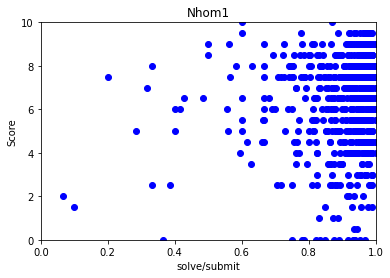

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Solved_div_sub = np.array(k)
Score = np.array(q)
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.scatter(Solved_div_sub,Score,c="blue")
plt.title("Nhom1")
plt.xlabel("solve/submit")
plt.ylabel("Score")

plt.show()

Đánh giá:
- Các điểm phân bố không có quy luật rõ ràng, nhưng có xu hướng đổ dồn về phía bên phải của biểu đồ 

Không phù hợp để đưa ra làm một chỉ số để đánh giá 

In [ ]:
# Tổng số problem đã sumbit / Tổng số submissions
#Tổng số problem đã submit: count_submit

#Tổng số submitsion
total_sub=data.groupby('user_id').agg(So_lan_nop_bai=('problem_id', 'count'))

table1=pandas.merge(count_submit, total_sub, on=['user_id'])
table1['coutdivtotal']=table1['count']/table1['So_lan_nop_bai']
# print(table1[['user_id', 'coutdivtotal']])
table1=pandas.merge(table1, table_score, on = ['user_id'])
# print(table1)
table1=table1.apply(pandas.to_numeric, errors='coerce')
table1=table1.dropna()
print(table1[['user_id', 'coutdivtotal', 'CK']])

     user_id  coutdivtotal    CK
0         24      0.469512   9.5
1         27      0.384615  10.0
2         29      0.402010   8.5
3         35      0.508418   4.5
4         37      0.326923   7.5
..       ...           ...   ...
677     1771      0.370000   5.5
678     1856      0.484375   7.5
679     1857      0.727273   4.0
680     1859      0.967742   1.5
681     1862      0.500000   7.5

[682 rows x 3 columns]


In [ ]:
Tu1=table1['coutdivtotal']
Mau1=table1['CK']
tu1=[]
mau1=[]
for i in range(len(table1.index)):
  tu1.append(Tu1[i])
  mau1.append(Mau1[i])


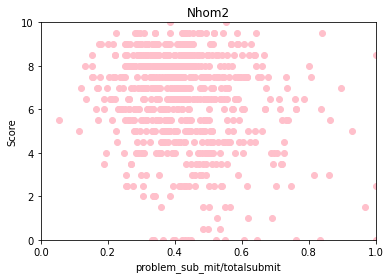

In [ ]:

Coutdivtotal = np.array(tu1)
Score = np.array(mau1)
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.scatter(Coutdivtotal,Score,c="pink")
plt.title("Nhom2")
plt.xlabel("problem_sub_mit/totalsubmit")
plt.ylabel("Score")
plt.show()

Ở mẫu dữ liệu này ta thấy các điểm dữ liệu phân bố có xu hướng co cụm lại ở mạn góc trái, nhưng các mốc điểm không rõ ràng, có thể dữ liệu này có liên quan tới kết quả bài toán, nhưng không nhiều.

In [ ]:
#Số lần submit đúng (pre_score=10000) / tổng số submissions 
#số lần submit đúng
correct_sub=data[data.pre_score==10000]
correct_sub=correct_sub.groupby(['user_id']).agg(So_lan_submit_dung = ('user_id', 'count'))

#Tổng số submit: total_sub
table2=pandas.merge(correct_sub, total_sub, on=['user_id'])
table2=pandas.merge(table2, table_score, on = ['user_id'])
table1=table1.apply(pandas.to_numeric, errors='coerce')
table1=table1.dropna()
table2['correctdivtotal']=table2['So_lan_submit_dung']/table2['So_lan_nop_bai']

print(table2[['user_id', 'correctdivtotal', 'CK']])


     user_id  correctdivtotal    CK
0         24         0.487805   9.5
1         27         0.307692  10.0
2         29         0.376884   8.5
3         35         0.511785   4.5
4         37         0.320513   7.5
..       ...              ...   ...
669     1771         0.255000   5.5
670     1856         0.359375   7.5
671     1857         0.672727   4.0
672     1859         0.096774   1.5
673     1862         0.333333   7.5

[674 rows x 3 columns]


In [ ]:
X2=table2['correctdivtotal']
Y2=table2['CK']
x2=[]
y2=[]
for i in range(len(table2.index)):
  x2.append(X2[i])
  y2.append(Y2[i])

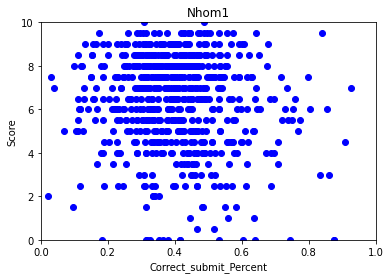

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Correct = np.array(x2)
Score = np.array(y2)
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.scatter(Correct,Score,c="blue")
plt.title("Nhom1")
plt.xlabel("Correct_submit_Percent")
plt.ylabel("Score")

plt.show()

#### Nhận xét:
Ở mẫu dữ liệu này ta thấy các điểm dữ liệu phân bố có xu hướng co cụm lại ở mạn góc trái, nhưng các mốc điểm không rõ ràng, có thể dữ liệu này có liên quan tới kết quả bài toán, nhưng không nhiều.


#Xét tiêu chí tổng thời gian submit của mỗi user_id

In [ ]:
# Với mỗi user_id tìm thời điểm submit đầu tiên và cuối cùng
data['created_at'] = pd.to_datetime(data['created_at'])
df=data.groupby('user_id')['created_at'].agg(['first','last'])
df


,first,last
user_id,,
1,2020-11-08 16:50:00,2020-12-01 01:59:00
4,2020-10-30 10:58:00,2021-01-20 11:42:00
5,2020-11-15 00:00:00,2020-11-27 01:04:00
6,2020-11-05 03:28:00,2021-01-07 04:39:00
7,2020-12-26 03:28:00,2020-12-30 03:26:00
...,...,...
1860,2020-11-27 07:48:00,2021-02-25 12:43:00
1862,2020-11-27 14:34:00,2020-12-04 08:15:00
1864,2020-12-13 10:47:00,2021-01-22 08:58:00


In [ ]:
# Tính tổng thời gian làm bài (submit) trong suốt quá trình học
start=pd.to_datetime(df['first'])
end=pd.to_datetime(df['last'])
df['Sum_timeSub']=end-start
df

,first,last,Sum_timeSub
user_id,,,
1,2020-11-08 16:50:00,2020-12-01 01:59:00,22 days 09:09:00
4,2020-10-30 10:58:00,2021-01-20 11:42:00,82 days 00:44:00
5,2020-11-15 00:00:00,2020-11-27 01:04:00,12 days 01:04:00
6,2020-11-05 03:28:00,2021-01-07 04:39:00,63 days 01:11:00
7,2020-12-26 03:28:00,2020-12-30 03:26:00,3 days 23:58:00
...,...,...,...
1860,2020-11-27 07:48:00,2021-02-25 12:43:00,90 days 04:55:00
1862,2020-11-27 14:34:00,2020-12-04 08:15:00,6 days 17:41:00
1864,2020-12-13 10:47:00,2021-01-22 08:58:00,39 days 22:11:00


####Kết bảng điểm cuối kỳ với Sum_timeSub thông qua id

In [ ]:
table_score.head(25)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [ ]:
# Đổi id trong file điểm cuối kỳ thành user_id cho giống
# file wecode để kết lại với nhau
table_score.rename(columns={'id':'user_id'}, inplace=True)
table_score.head(25)

,user_id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [ ]:
# Hàm xóa những điểm dữ liệu có giá trị null hết hoặc bất kỳ cột nào có null
table_score = table_score.apply (pd.to_numeric, errors='coerce')
table_score=table_score.dropna()
table_score.head(25)# In ra 25 dữ liệu đầu

,user_id,QT,GK,TH,CK,TBM,TBTL
0,22,10.0,9.0,8.5,8.5,8.8,8.52
1,24,10.0,8.0,10.0,9.5,9.4,8.41
2,27,10.0,10.0,10.0,10.0,10.0,8.67
3,28,10.0,9.5,7.5,9.5,9.2,7.39
4,29,10.0,9.5,5.0,8.5,8.2,8.05
5,30,10.0,10.0,9.0,9.0,9.3,8.63
7,35,7.0,9.5,6.0,4.5,6.2,5.75
8,36,4.5,8.0,9.0,7.0,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27
10,40,10.0,7.0,10.0,8.0,8.6,8.54


In [ ]:
df1=pd.merge(df,table_score,on='user_id')
df1.head(25) # Hiển thị 25 dữ liệu đầu

,user_id,first,last,Sum_timeSub,QT,GK,TH,CK,TBM,TBTL
0,24,2020-11-05 17:46:00,2021-01-15 15:52:00,70 days 22:06:00,10.0,8.0,10.0,9.5,9.4,8.41
1,27,2020-11-05 08:57:00,2020-11-07 15:05:00,2 days 06:08:00,10.0,10.0,10.0,10.0,10.0,8.67
2,29,2020-11-03 17:49:00,2021-01-14 09:12:00,71 days 15:23:00,10.0,9.5,5.0,8.5,8.2,8.05
3,35,2020-11-03 09:23:00,2021-01-19 04:14:00,76 days 18:51:00,7.0,9.5,6.0,4.5,6.2,5.75
4,37,2020-11-06 03:14:00,2021-01-22 08:57:00,77 days 05:43:00,5.5,5.5,7.5,7.5,6.9,8.27
5,40,2020-11-16 06:40:00,2021-02-27 10:39:00,103 days 03:59:00,10.0,7.0,10.0,8.0,8.6,8.54
6,42,2020-11-03 09:24:00,2021-03-01 09:27:00,118 days 00:03:00,7.5,10.0,9.0,7.5,8.5,8.72
7,43,2020-11-12 02:11:00,2021-03-19 15:39:00,127 days 13:28:00,10.0,8.5,7.0,6.0,7.2,7.97
8,49,2020-11-06 03:16:00,2021-01-22 08:30:00,77 days 05:14:00,4.5,4.0,8.0,5.5,5.9,6.74
9,52,2020-11-06 03:01:00,2021-01-22 08:54:00,77 days 05:53:00,5.5,5.0,7.5,4.5,5.6,7.79


In [ ]:
import numpy as np
df1['hSum_timeSub'] = df1['Sum_timeSub'] / np.timedelta64(1, 'h')
df1

,user_id,first,last,Sum_timeSub,QT,GK,TH,CK,TBM,TBTL,hSum_timeSub
0,24,2020-11-05 17:46:00,2021-01-15 15:52:00,70 days 22:06:00,10.0,8.0,10.0,9.5,9.4,8.41,1702.100000
1,27,2020-11-05 08:57:00,2020-11-07 15:05:00,2 days 06:08:00,10.0,10.0,10.0,10.0,10.0,8.67,54.133333
2,29,2020-11-03 17:49:00,2021-01-14 09:12:00,71 days 15:23:00,10.0,9.5,5.0,8.5,8.2,8.05,1719.383333
3,35,2020-11-03 09:23:00,2021-01-19 04:14:00,76 days 18:51:00,7.0,9.5,6.0,4.5,6.2,5.75,1842.850000
4,37,2020-11-06 03:14:00,2021-01-22 08:57:00,77 days 05:43:00,5.5,5.5,7.5,7.5,6.9,8.27,1853.716667
...,...,...,...,...,...,...,...,...,...,...,...
677,1771,2020-11-19 16:52:00,2021-01-28 18:50:00,70 days 01:58:00,0.0,5.0,4.0,5.5,4.4,6.40,1681.966667
678,1856,2021-01-14 02:34:00,2021-01-29 07:05:00,15 days 04:31:00,5.0,5.5,7.0,7.5,6.7,7.34,364.516667
679,1857,2020-12-11 08:21:00,2021-01-29 08:28:00,49 days 00:07:00,5.0,4.5,10.0,4.0,6.0,6.03,1176.116667
680,1859,2020-12-04 08:12:00,2021-01-29 07:02:00,55 days 22:50:00,8.0,5.0,10.0,1.5,5.4,5.06,1342.833333


####Với mỗi sinh viên ta chỉ quan tâm tới tổng thời gian submit wecode có ảnh hưởng tới điểm cuối kỳ hay không nên ta xóa các cột không cần thiết

In [ ]:
df2=df1[['user_id','hSum_timeSub','CK']]
df2

,user_id,hSum_timeSub,CK
0,24,1702.100000,9.5
1,27,54.133333,10.0
2,29,1719.383333,8.5
3,35,1842.850000,4.5
4,37,1853.716667,7.5
...,...,...,...
677,1771,1681.966667,5.5
678,1856,364.516667,7.5
679,1857,1176.116667,4.0
680,1859,1342.833333,1.5


####Vẽ biểu đồ

In [ ]:
#Đưa các dữ liệu ở cột hSum_timeSub và CK vào hai mảng x, y để vã biểu đồ
X=df1['hSum_timeSub']
Y=df1['CK']
x=[]
y=[]
for i in range(len(df1.index)): #Duyệt từng phần tử đưa vào mảng
  x.append(X[i])
  y.append(Y[i])
print(x, y)

[1702.1, 54.13333333333333, 1719.3833333333334, 1842.85, 1853.7166666666667, 2475.983333333333, 2832.05, 3061.4666666666667, 1853.2333333333333, 1853.8833333333334, 1681.8333333333333, 1735.45, 2171.5666666666666, 2.066666666666667, 206.98333333333332, 103.98333333333333, 2331.633333333333, 0.3333333333333333, 1853.7166666666667, 659.05, 168.8, 2287.5833333333335, 2232.0666666666666, 673.7833333333333, 1853.6833333333334, 295.56666666666666, 1853.6666666666667, 1466.2166666666667, 1472.9666666666667, 1853.7333333333333, 2225.4333333333334, 2940.866666666667, 3136.25, 1853.7666666666667, 90.0, 70.76666666666667, 2693.5, 2170.883333333333, 2408.25, 1622.5666666666666, 1760.6166666666666, 1843.7166666666667, 1821.2166666666667, 2326.95, 1680.7, 1729.9166666666667, 1761.2, 2185.4666666666667, 1823.35, 504.06666666666666, 694.7333333333333, 69.1, 1853.7, 1853.7666666666667, 52.43333333333333, 1679.9666666666667, 1795.6666666666667, 84.96666666666667, 106.03333333333333, 1843.0333333333333, 

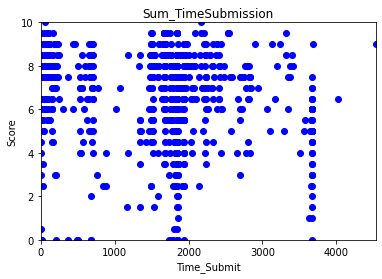

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Time_Submit = np.array(x)
Score = np.array(y)
plt.xlim(0, max(x))
plt.ylim(0, 10)
plt.scatter(Time_Submit,Score,c="blue")
plt.title("Sum_TimeSubmission")
plt.xlabel("Time_Submit")
plt.ylabel("Score")

plt.show()

In [ ]:
print('time_submax=',df1['hSum_timeSub'].max())
print('time_submin=',df1['hSum_timeSub'].min())

time_submax= 4532.783333333334
time_submin= 0.0


####Nhận xét
- Biểu đồ phân bố không đồng đều.
- Những bạn có thời gian làm bài wecode không nhiều, thậm chí rất ít nhưng vẫn có thể điểm CK cao hơn những bạn dành thời gian làm nhiều. Mà điều quan trọng hơn là điểm cao ngất ngưỡng.
- Trong khi có những bạn làm bài tương đối nhiều hoặc nhiều nhất có thể thì điểm CK lại không cao bằng những bạn làm ít. Số lượng TH này ít hơn so với TH trên
- Do đó, có thể kết luận thời gian làm bài wecode có thể không ảnh hưởng đến điểm CK.